### Table of contents

01. Importing Libraries

02. Importing Data Set

03. Creating Charts and exporting

# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data Set(s)

In [2]:
# Creating a path variable as a short cut for future importing of data
path = r'/Users/tuor/DA Projects/230321 Instacart Basket Analysis'

In [3]:
# Importing orders_products_merged data frame
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '230329_order_products_merged.pkl'))

# 03. Creating Charts

## 03.1 Bar

In [4]:
# Allowing the view of all collumn headers
pd.set_option("display.max_columns", None)

In [5]:
# Showing all column titles for quick reference through out plotting
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,_merge,merge_indicator,price_range_loc,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_user_product_price,spender_flag,median_prior_order,freq_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,3.0,5,0,both,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,20.0,1,1,both,both,Mid-range product,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,6.0,20,0,both,both,Mid-range product,Busiest day,Average orders,5,New customer,7.930208,Low spender,8.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,NaN,10,0,both,both,Mid-range product,2nd Least busy,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,9.0,11,1,both,both,Mid-range product,Least busy,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


Text(0, 0.5, 'Count')

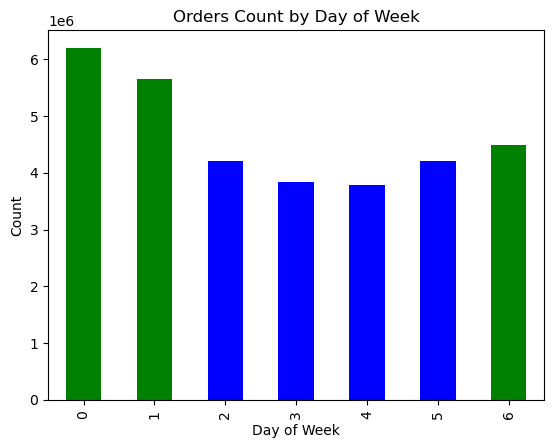

In [8]:
# Creating a bar chart of days of the week with sorting to give the index order and color
three_highest_order_day_bar = ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['green','green', 'blue','blue', 'blue','blue','green'])

# Set the title and axis labels
plt.title('Orders Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')

In [11]:
# Saving the figure to Visualizations folder
three_highest_order_day_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'three_highest_order_day_bar.png'))

## 03.2 Histogram

Text(0, 0.5, 'Frequency')

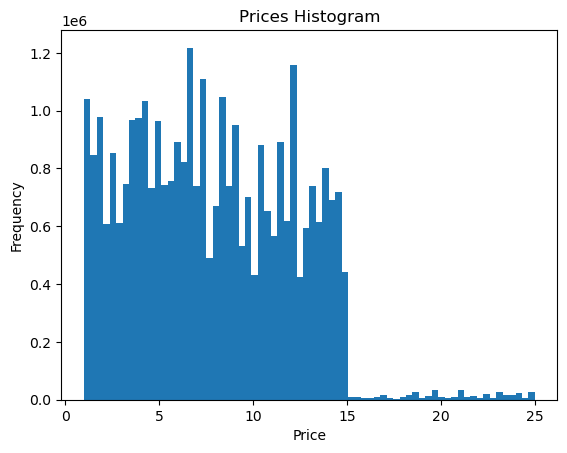

In [9]:
#Creating histogram of prices of products
hist_prices = ords_prods_merge['prices'].plot.hist(bins = 70)

# Set the title and axis labels
plt.title('Prices Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [10]:
# Saving the figure to Visualizations folder
hist_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

## 03.3 Scatterplot

In [20]:
ords_prods_merge['prices'].mean()

7.790238162911445

In [21]:
ords_prods_merge['prices'].median()

7.4

In [22]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:xlabel='prices', ylabel='prices'>

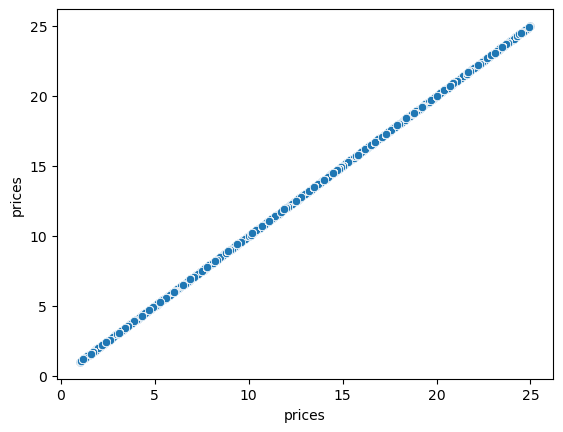

In [19]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

## 03.4 Line Charts

### 03.4.1 Sampling

In [15]:
# Creating a list holding True/False values to the test np.random.rant( <= 0.7)
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
# Storing 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [17]:
# Storing 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [18]:
len(ords_prods_merge)

32406041

In [19]:
len(big) + len(small)

32406041

### 03.4.2 The Line Chart

In [20]:
# Selecting only the columns needed to improve processing time
df_2 = small[['order_day_of_week','prices']]

Text(0.5, 1.0, 'Average Price by Day of the Week')

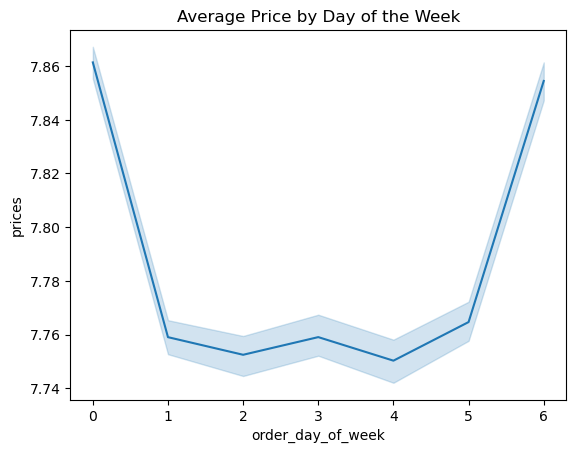

In [23]:
# Creating line Plot
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

# Set the title and axis labels
plt.title('Average Price by Day of the Week')

In [24]:
# Saving the figure to Visualizations folder
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))